In [1]:
from gym import core, spaces
import numpy as np
class TreeSimple(core.Env):
    def __init__(self, L = 5.0, init_y = 2, g = -5, dt = .1, tol = .1, N = 5):
        self.L = L
        self.init_y = init_y
        self.g = g
        self.dt = dt
        self.tol = tol
        self.N = N
        
        self.observation_space = spaces.Box(low = np.array([-10.0, -10.0]), high = np.array([10.0, 10.0]))
        self.action_space = spaces.Box(low=np.array([-self.L]), high=np.array([self.L]))
                
        self.deadzone = np.array([3,7])
        self.xrange = np.array([0.0, 10.0])
        
    def seed(self, seed=None):
        np.random.seed(seed)
        
    def reset(self):
        self.x = np.random.uniform(low=self.xrange[0], high=self.xrange[1])
        self.y = self.init_y
        self.X = np.array([self.x, self.y])
        self.cur_step = 0
        return self.X
    
    def step(self, act):
        x = self.X[0]
        y = self.X[1]
        reward = np.array([0.0], dtype=act.dtype)
        done = False
        
        
        act = np.clip(act, -self.L, self.L)
        
        x += act*self.dt
        x = np.clip(x, self.xrange[0], self.xrange[1]).item()
        y += self.g*self.dt
        
        self.X = np.array([x,y])
        
      
        reward = -0.01*act**2 + 1;
        
        if (self.deadzone[0] < x < self.deadzone[1]) and (-self.tol < y < self.tol):
            done = True
            reward -= 25.0
            
        self.cur_step += 1
        if self.cur_step >= self.N:
            done = True
            
        return self.X, reward, done, {}
        
        
        
        

In [2]:
from gym import register
register(id='tree_simple-v0', entry_point=TreeSimple)

In [3]:
import gym
env = gym.make('tree_simple-v0')
env.reset()
env.step(env.action_space.sample())
env.step(env.action_space.sample())

/home/sgillen/anaconda3/envs/baselines/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


(array([6.77465773, 1.        ]),
 array([0.99369913], dtype=float32),
 False,
 {})

In [4]:
from seagul.rl.sac import SACAgent, SACModel
from seagul.nn import MLP

In [5]:
policy_net = MLP(env.observation_space.shape[0], env.action_space.shape[0]*2, 2, 32, input_bias=True)
value_net = MLP(env.observation_space.shape[0], 1, 2, 32, input_bias=True)
q1_net = MLP(env.observation_space.shape[0]+env.action_space.shape[0], 1, 2, 32, input_bias=True)
q2_net = MLP(env.observation_space.shape[0]+env.action_space.shape[0], 1, 2, 32, input_bias=True)


model = SACModel(policy_net, value_net, q1_net, q2_net, 5) 
agent = SACAgent('tree_simple-v0', model, env_max_steps = 5)

In [6]:
agent.learn(10000);

/home/sgillen/anaconda3/envs/baselines/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


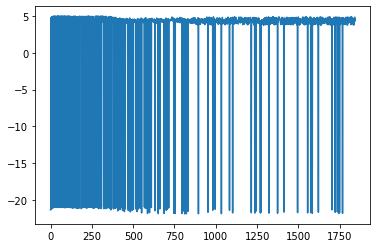

In [7]:
import matplotlib.pyplot as plt
plt.plot(agent.raw_rew_hist)

In [8]:
x = np.linspace(0,10, 100);
y = np.linspace(2,-1,100);


U = np.zeros([x.shape[0], y.shape[0]]);

for i in range(U.shape[0]):
    for j in range(U.shape[1]):
        U[i,j] = agent.model.policy(np.array([x[i], y[j]], dtype=np.float32))[0]



In [10]:
X,Y = np.meshgrid(x,y)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

%matplotlib qt

ax.plot_surface(X,Y,U)
plt.show()

In [23]:
deadzones = [[2, 4],[6,8]]
x = 5
for deadzone in deadzones[:]:


[2, 4]
[6, 8]


In [20]:
deadzones[:,0] 

array([2, 6])